In [85]:
# To remove useless future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Se carga el archivo y se separa en entrenamiento y prueba

In [27]:
from sklearn.model_selection import train_test_split
dataALL=pd.read_csv('datasets/dataTuberculosis.csv')  
N=len(dataALL)
cTrain=int(N*0.8) # 80% para entrenar y 20% para probar
cTest=N-cTrain
print(N,cTrain,cTest)
train_data,test_data= sklearn.model_selection.train_test_split(dataALL, train_size=cTrain, test_size=cTest)

1455 1164 291


In [28]:
train_data.shape

(1164, 15)

In [29]:
train_data.head()

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COOMORBILIDAD,MALNUTRICION,Contactos,ContactosSR,ContactosSRExaminadosconBK,ContactosMenores5Anios,VIHCONFIRMADO,RECIBETAR,RECIBETRIMETOPRIN,RDOBKDX,RDOSALIDA
946,0,37.0,2,4,5,0,6,0,0,0,2,2,2,5,1
846,1,72.0,2,4,2,0,0,0,0,0,2,2,2,4,1
555,1,25.0,2,4,5,0,0,0,0,0,2,2,2,2,1
12,1,42.0,2,4,5,0,4,0,0,0,2,2,2,5,0
1426,1,27.0,2,3,5,0,0,0,0,0,2,2,2,3,1


In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164 entries, 946 to 1449
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEXO                        1164 non-null   int64  
 1   EDAD                        1164 non-null   float64
 2   ETNIA                       1164 non-null   int64  
 3   GRUPOPOBLACIONAL            1164 non-null   int64  
 4   COOMORBILIDAD               1164 non-null   int64  
 5   MALNUTRICION                1164 non-null   int64  
 6   Contactos                   1164 non-null   int64  
 7   ContactosSR                 1164 non-null   int64  
 8   ContactosSRExaminadosconBK  1164 non-null   int64  
 9   ContactosMenores5Anios      1164 non-null   int64  
 10  VIHCONFIRMADO               1164 non-null   int64  
 11  RECIBETAR                   1164 non-null   int64  
 12  RECIBETRIMETOPRIN           1164 non-null   int64  
 13  RDOBKDX                     116

In [31]:
train_data[["SEXO", "EDAD", "ETNIA", "GRUPOPOBLACIONAL","COOMORBILIDAD","MALNUTRICION","Contactos"]].describe()

,SEXO,EDAD,ETNIA,GRUPOPOBLACIONAL,COOMORBILIDAD,MALNUTRICION,Contactos
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,0.677835,40.736684,1.859107,3.517182,4.652921,0.048110,2.646048
std,0.467507,19.764933,0.357806,0.804468,0.962665,0.214091,5.589279
min,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,2.000000,3.000000,5.000000,0.000000,0.000000
50%,1.000000,35.000000,2.000000,4.000000,5.000000,0.000000,1.000000
75%,1.000000,57.000000,2.000000,4.000000,5.000000,0.000000,4.000000
max,1.000000,95.000000,2.000000,4.000000,5.000000,1.000000,111.000000


### Pipeline para los atributos numéricos

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

num_attribs = ["SEXO", "EDAD", "ETNIA", "GRUPOPOBLACIONAL","COOMORBILIDAD","MALNUTRICION","Contactos","ContactosSR","ContactosSRExaminadosconBK","ContactosMenores5Anios","VIHCONFIRMADO","RECIBETAR","RECIBETRIMETOPRIN","RDOBKDX"]

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler()) 
    
    ])
#MinMaxScaler() escala entre 0 y 1, pero dio peores resultados con svm

### Pipeline completo

In [33]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

### Extraemos las etiquetas de clase

In [34]:
y_train = train_data["RDOSALIDA"]
y_train

946     1
846     1
555     1
12      0
1426    1
       ..
670     1
582     1
1357    1
790     1
1449    1
Name: RDOSALIDA, Length: 1164, dtype: int64

In [35]:
X_train = full_pipeline.fit_transform(train_data)

In [36]:
X_train.shape

(1164, 14)

In [37]:
X_train

array([[-1.45051715, -0.1891375 ,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  1.04985217],
       [ 0.68940929,  1.58243666,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  0.14732047],
       [ 0.68940929, -0.79653436,  0.3939395 , ...,  0.27080395,
         0.2690492 , -1.65774293],
       ...,
       [ 0.68940929, -0.44221952,  0.3939395 , ...,  0.27080395,
         0.2690492 , -0.75521123],
       [ 0.68940929, -0.64468514,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  0.14732047],
       [ 0.68940929, -1.10023278,  0.3939395 , ..., -5.79103833,
        -5.42501017, -3.46280633]])

In [38]:
X_train[0,:]

array([-1.45051715, -0.1891375 ,  0.3939395 ,  0.60042872,  0.36069473,
       -0.2248144 ,  0.60032667, -0.22263618, -0.21269167, -0.2579297 ,
        0.30646544,  0.27080395,  0.2690492 ,  1.04985217])

In [39]:
X_train[:,0]

array([-1.45051715,  0.68940929,  0.68940929, ...,  0.68940929,
        0.68940929,  0.68940929])

# Entrenamiento del modelo con RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=300, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

### Utilizar validación cruzada con k=10

![Archivo no encontrado](kfold.png)

In [54]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.6658414382552315

# Entrenamiento del modelo con SVM

In [42]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto",random_state=42, kernel="linear")
#"rbf", "linear", "polynomial", "sigmoid", 
#svm_clf = SVR(gamma="auto", random_state=42)
svm_clf.fit(X_train, y_train)

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.696743295019157

# Entrenamiento con redes neuronales

In [76]:
from sklearn.neural_network import MLPClassifier
NN_clf = MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(4,3), random_state=1)
NN_clf.fit(X_train, y_train)
NN_scores = cross_val_score(NN_clf, X_train, y_train, cv=10)
NN_scores.mean()

0.6958885941644561

Graficar los resultados

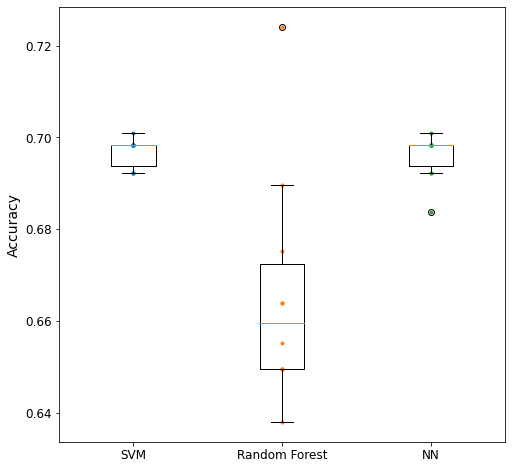

In [77]:
plt.figure(figsize=(8, 8))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.plot([3]*10, NN_scores, ".")
plt.boxplot([svm_scores, forest_scores,NN_scores], labels=("SVM","Random Forest","NN"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Analicemos el desempeño en el conjunto de prueba

In [78]:
X_test = full_pipeline.transform(test_data)
X_test

array([[-1.45051715,  1.22812183,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  1.04985217],
       [ 0.68940929, -0.89776717,  0.3939395 , ...,  0.27080395,
         0.2690492 , -0.75521123],
       [ 0.68940929,  0.41825935,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  0.14732047],
       ...,
       [ 0.68940929,  1.17750542,  0.3939395 , ...,  0.27080395,
         0.2690492 , -0.75521123],
       [ 0.68940929, -0.79653436,  0.3939395 , ...,  0.27080395,
         0.2690492 ,  0.14732047],
       [ 0.68940929, -0.69530155,  0.3939395 , ...,  0.27080395,
         0.2690492 , -0.75521123]])

In [80]:
#y_pred = svm_clf.predict(X_test)  #predecir con SVM
y_pred = forest_clf.predict(X_test) #predecir con RF
#y_pred = NN_clf.predict(X_test) #predecir con NN
y_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0])

In [81]:
y_test = test_data["RDOSALIDA"]

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6494845360824743

In [83]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 29,  60],
       [ 42, 160]])

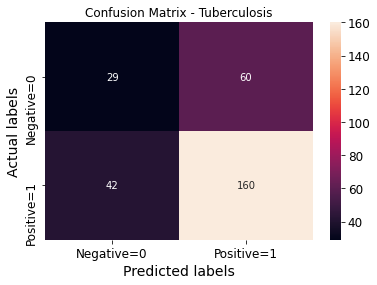

In [84]:
%matplotlib inline

ax = plt.subplot()
sns.heatmap(confusion_matrix, annot=True, ax = ax, fmt='d')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels') 
ax.set_title('Confusion Matrix - Tuberculosis') 
ax.xaxis.set_ticklabels(['Negative=0', 'Positive=1'])
ax.yaxis.set_ticklabels(['Negative=0', 'Positive=1']);
plt.show();